In [1]:
import random
import matplotlib.pyplot as plt
from pathlib import Path
from preprocessing import clean_gutenberg, tokenize
from collocations import make_graph, cosine_similarities
from plotting import draw_graph

In [13]:
def read_all(directory):
    return [file.read_text() for file in Path(directory).glob('*') if file.is_file()]

def flatten(lst):
    return [x for ls in lst for x in ls]

def neighbourhood(graph, node, filter_function=lambda edges: edges):
    edges = filter_function(graph.out_edges(node, data=True))
    return graph.edge_subgraph([(edge[0], edge[1]) for edge in edges])

def top_n_filter(n):
    return lambda edges: sorted(edges, key=lambda item: item[2]["weight"], reverse=True)[:n]

def draw(graph):
    return draw_graph(graph, label_attribute="weight", label_function=lambda x: f"{x:.3f}", width_attribute="weight")

In [3]:
tokens1, vocabulary1 = tokenize(clean_gutenberg(text) for text in read_all("data/1"))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [4]:
tokens2, vocabulary2 = tokenize(clean_gutenberg(text) for text in read_all("data/2"))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [5]:
vocabulary = sorted(set(vocabulary1) & set(vocabulary2))
len(vocabulary)

10540

In [6]:
G1 = make_graph(flatten(tokens1), vocabulary)

In [7]:
G2 = make_graph(flatten(tokens2), vocabulary)

In [8]:
similarities = cosine_similarities(G1, G2, vocabulary)
similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)

  0%|          | 0/10540 [00:00<?, ?it/s]

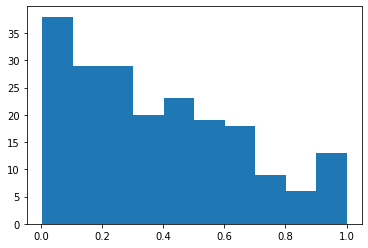

In [9]:
_ = plt.hist([score for _, score in similarities if score > 0])

In [12]:
node, score = random.choice([(node, score) for node, score in similarities if 1 > score > 0])
node, score

('eat', 0.5123959929479619)

In [14]:
draw(neighbourhood(G1, node, filter_function=top_n_filter(10)))

In [15]:
draw(neighbourhood(G2, node, filter_function=top_n_filter(10)))

In [16]:
scored_nodes = [(node, score) for node, score in similarities if 1 > score > 0]

In [17]:
len(scored_nodes)

198

In [18]:
len(similarities)

10540

In [19]:
sorted(scored_nodes[-30:],key=lambda scored_node: scored_node[1])

[('lady', 0.003484425138998452),
 ('past', 0.004594905252338177),
 ('colour', 0.005649907517195315),
 ('enter', 0.005863003125294315),
 ('glad', 0.011348646708614012),
 ('money', 0.012613839520366774),
 ('answer', 0.015129220970544874),
 ('tall', 0.016110270184075008),
 ('home', 0.01653169052370461),
 ('sound', 0.01786448309723066),
 ('matter', 0.0199904954354292),
 ('soon', 0.02420323308457267),
 ('meet', 0.026260354839165386),
 ('bright', 0.028415621156803048),
 ('spend', 0.028421751381830614),
 ('sit', 0.02968226270419058),
 ('far', 0.03089476951873908),
 ('talk', 0.032519730452764684),
 ('place', 0.05739964283871083),
 ('walk', 0.060625895503122605),
 ('new', 0.06132877024985742),
 ('short', 0.061367232029001864),
 ('near', 0.06358789776015285),
 ('room', 0.06475757035245955),
 ('tear', 0.06613763809510262),
 ('married', 0.0745689219258304),
 ('grow', 0.07738995988889905),
 ('bear', 0.07752737115707808),
 ('lie', 0.07823386445750606),
 ('thank', 0.08034395056187073)]